In [2]:
# Import knihoven
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from random import random, uniform
from scipy.spatial import ConvexHull
from matplotlib import path

In [3]:
# Parametry simulace
num_runs = 20
max_nodes = 1000
tunnel_detected_runs = []

In [4]:
# Definice tunelů (polygonů) - 3 únnikové cesty + větvení
tunnels = [
    np.array([[2, 2], [2, 8], [3, 8], [3, 2]]),   # Tunel 1
    np.array([[3, 8], [7, 8], [7, 9], [3, 9]]),   # Tunel 2
    np.array([[7, 8], [8, 8], [8, 2], [7, 2]]),   # Tunel 3
    np.array([[3, 2], [7, 2], [7, 1], [3, 1]]),   # Tunel 4 (spodní)
    np.array([[7, 2], [9, 2], [9, 0], [7, 0]]),   # Úniková cesta 1
    np.array([[7, 8], [9, 8], [9, 10], [7, 10]]), # Úniková cesta 2
    np.array([[2, 8], [0, 8], [0, 10], [2, 10]])  # Úniková cesta 3
]

In [5]:
# Aktivní (startovací) bod
start = np.array([2.5, 2.5])

In [6]:
# Kontrola prŭchodu tunelem
def point_in_tunnel(point):
    for idx, tunnel in enumerate(tunnels):
        p = path.Path(tunnel)
        if p.contains_point(point):
            return idx
    return -1

In [8]:
# RRT algoritmus (zjednodušený)
def run_rrt():
    nodes = [start]
    visited_tunnels = set()
    for _ in range(max_nodes):
        rand_point = np.array([uniform(0, 10), uniform(0, 10)])
        dists = [np.linalg.norm(rand_point - node) for node in nodes]
        nearest_node = nodes[np.argmin(dists)]
        direction = rand_point - nearest_node
        if np.linalg.norm(direction) == 0:
            continue
        new_node = nearest_node + direction / np.linalg.norm(direction) * 0.5
        nodes.append(new_node)

        tunnel_idx = point_in_tunnel(new_node)
        if tunnel_idx >= 0:
            visited_tunnels.add(tunnel_idx)

    return visited_tunnels

In [9]:
# Spuštění simulace
for run in range(num_runs):
    visited = run_rrt()
    tunnel_detected_runs.append(visited)

In [10]:
# Vyhodnocení - zjistíme, jestli byly všechny tunely detekovány
all_tunnels = set(range(len(tunnels)))
detected = [visited for visited in tunnel_detected_runs if all_tunnels.issubset(visited)]

print(f"Počet průběžných detekcí všech tunelů: {len(detected)} z {num_runs}")

Počet průběžných detekcí všech tunelů: 20 z 20


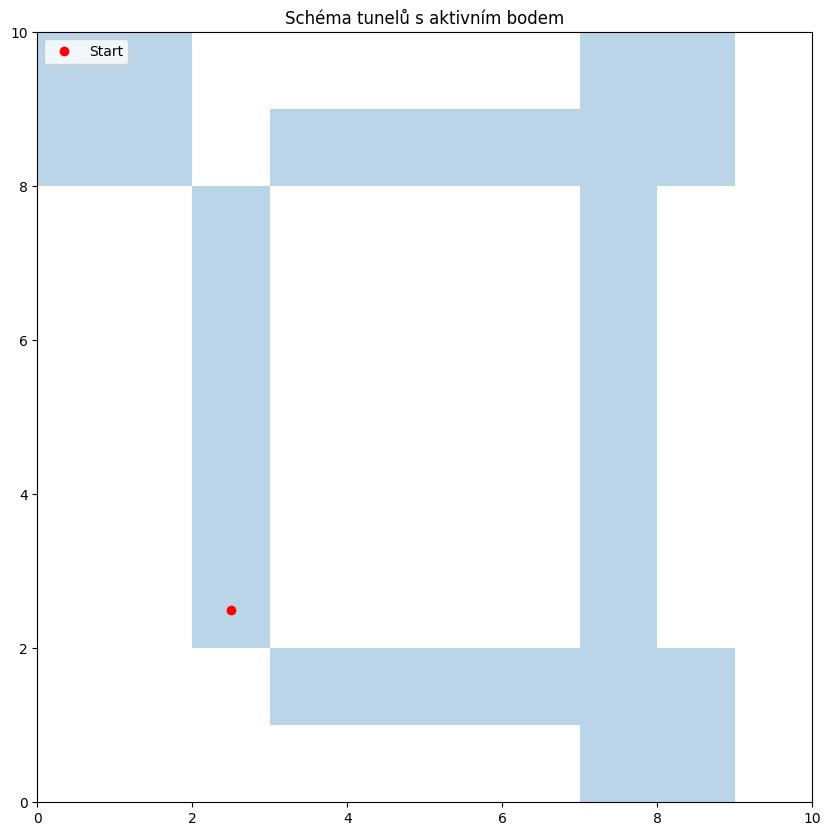

In [11]:
# Vizualizace posledního průběhu
plt.figure(figsize=(10, 10))
for tunnel in tunnels:
    plt.gca().add_patch(Polygon(tunnel, closed=True, fill=True, alpha=0.3))
plt.plot(start[0], start[1], 'ro', label='Start')
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.legend()
plt.title('Schéma tunelů s aktivním bodem')
plt.show()